# Decision Boundary Homework



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Sklearn has a couple of "standard" example data generators for use in working with classification models, these are some models used to synthesize data
for practice purposes.  Below are a couple of examples.

These are both pretty simple,  they are using just two variables

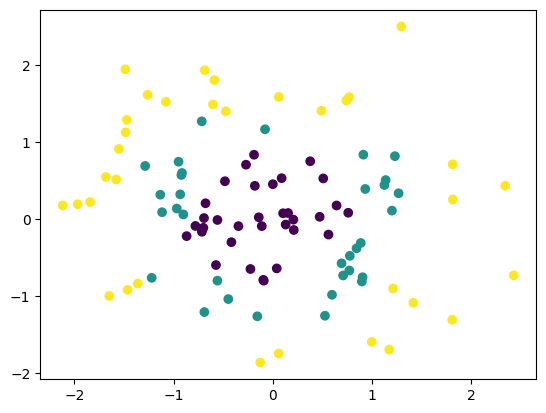

In [ ]:
from sklearn.datasets import make_gaussian_quantiles, make_classification

X,y=make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X[:,0],X[:,1], c=y)

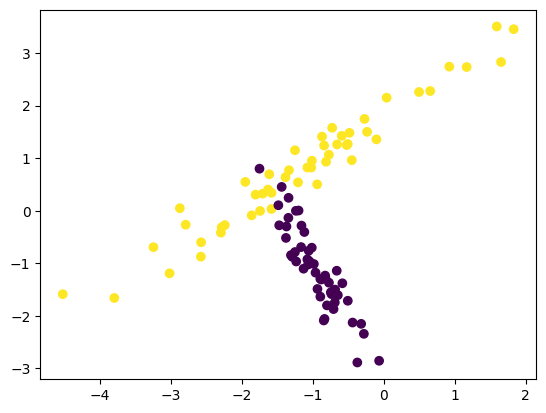

In [ ]:
X1, y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:,0],X1[:,1], c=y1)

Question/Action


- For each of these data sets,  (X,y) and (X1,y1)

a.) Generate two test sets (X_test, y_test),(X1_test,y1_test), by running the generators again, with the same parameters.  
     This will generate test sets with the same distributions but different values.

b.) Build some a number of classifiers for each set
    -logistic
    -the logistic again, but add columns for X1^2 and X2^2 as predictors
    -neural net
    -random forest
    -two different boosted methods
    
    Do some basic hyperparameter searches on each model (except the logistic)

c.) Write a function that will allow you to pass in the model and the X, y set and then generate from that a plot of the decision boundary for the example

d.) Use your function to plot out the decision boundaries for each of your models and for the two data sets

e.) Based on your examination of the two data sets and the resulting plots,  what can you say about the nature of the models?
    -which of them can generate curved boundaries?  Which are all straight line boundaries?
    -which looks most severely overfit?

a.) Generate two test sets (X_test, y_test),(X1_test,y1_test), by running the generators again, with the same parameters.  
     This will generate test sets with the same distributions but different values.

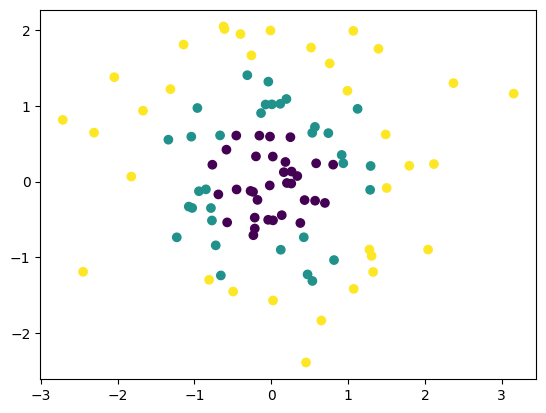

In [ ]:
X_test,y_test =make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)

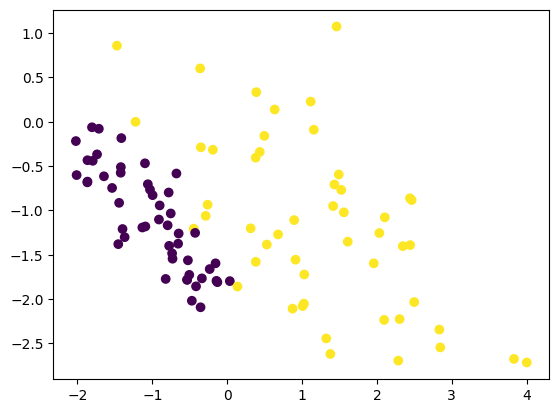

In [ ]:
X1_test, y1_test = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1_test[:,0],X1_test[:,1], c=y1_test)

b.) Build some a number of classifiers for each set

 -logistic

 -the logistic again, but add columns for X1^2 and X2^2 as predictors

 -neural net

 -random forest

 -two different boosted methods
    
Do some basic hyperparameter searches on each model (except the logistic)

c.) Write a function that will allow you to pass in the model and the X, y set and then generate from that a plot of the decision boundary for the example



d.) Use your function to plot out the decision boundaries for each of your models and for the two data sets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Determine the range of feature values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid of feature values
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

First dataset
0.41


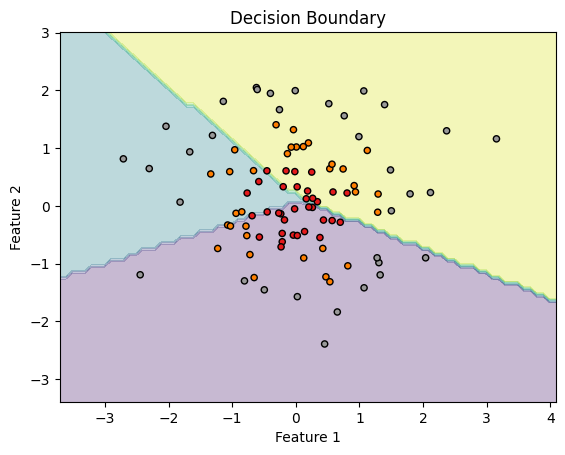


Second dataset
0.95


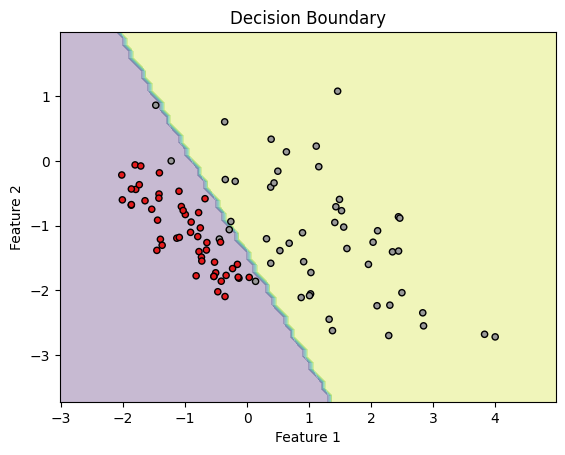

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_test, y_test)
print('First dataset')
print(logistic_model.score(X_test, y_test))
plot_decision_boundary(logistic_model, X_test, y_test)
print()


logistic_model = LogisticRegression()
logistic_model.fit(X1_test, y1_test)
print('Second dataset')
print(logistic_model.score(X1_test, y1_test))
plot_decision_boundary(logistic_model, X1_test, y1_test)


In [ ]:
def plot_decision_boundary2(model, X, y):
  # Determine the range of feature values
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  # Create a meshgrid of feature values
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  # Predict the class for each point in the meshgrid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2])
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.3)

  # Plot the data points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary')
  plt.show()


First dataset
0.96


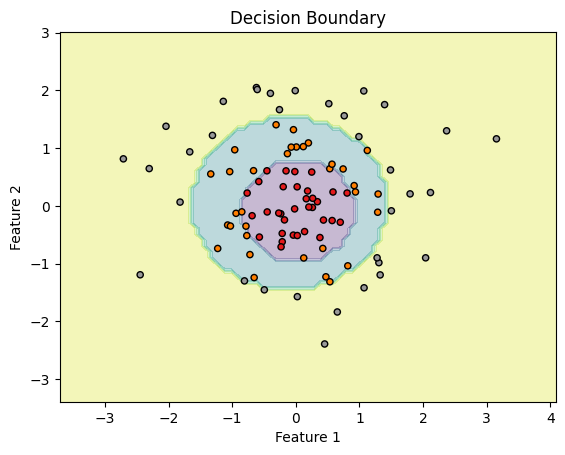


Second dataset
0.95


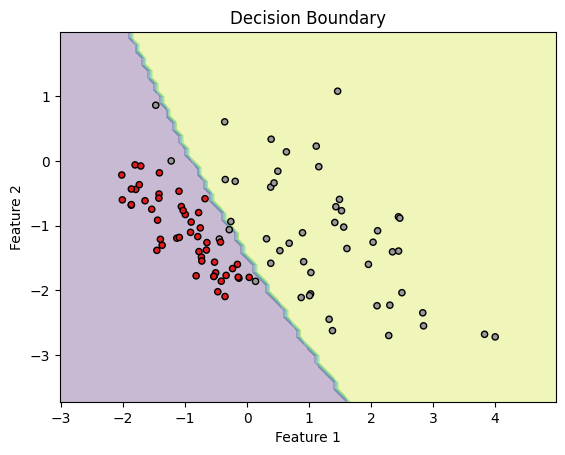

In [ ]:
# the logistic again, but add columns for X1^2 and X2^2 as predictors
import pandas as pd
dataset = X_test.copy()

def addingX1squared_X2squared(dataset):
  df = pd.DataFrame(dataset, columns=['X1','X2'])
  df['X1^2'] = df['X1']**2
  df['X2^2'] = df['X2']**2
  return df.values

# Adding X1^2 and X2^2
X_test2 = addingX1squared_X2squared(X_test)
X1_test2 = addingX1squared_X2squared(X1_test)

# Logistic regression
logistic_model2 = LogisticRegression()
logistic_model2.fit(X_test2, y_test)
print('First dataset')
print(logistic_model2.score(X_test2, y_test))
plot_decision_boundary2(logistic_model2, X_test2, y_test)
print()

logistic_model2.fit(X1_test2, y1_test)
print('Second dataset')
print(logistic_model2.score(X1_test2, y1_test))
plot_decision_boundary2(logistic_model2, X1_test2, y1_test)


First dataset
1.0


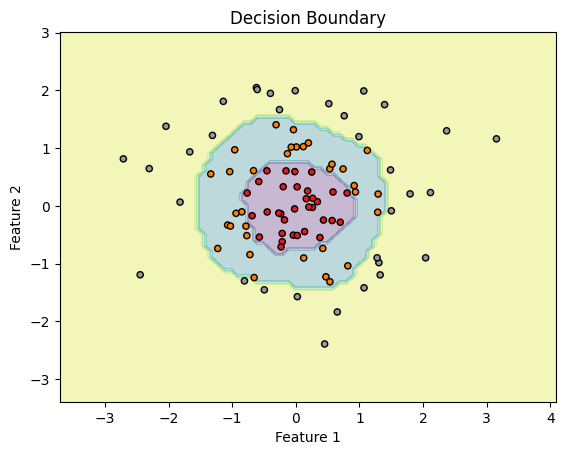


Second dataset
0.99


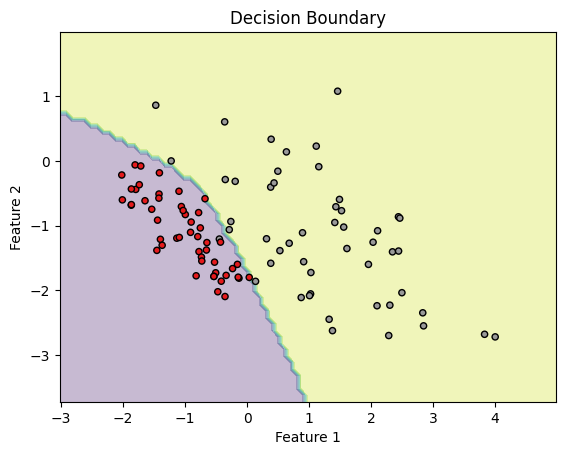

In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, hidden_layer_sizes=(100, 50), max_iter=20000)
clf.fit(X_test, y_test)
clf.predict_proba(X_test)
print('First dataset')
print(clf.score(X_test, y_test))
plot_decision_boundary(clf, X_test, y_test)
print()

clf.fit(X1_test, y1_test)
clf.predict_proba(X1_test)
print('Second dataset')
print(clf.score(X1_test, y1_test))
plot_decision_boundary(clf, X1_test, y1_test)


First dataset
1.0


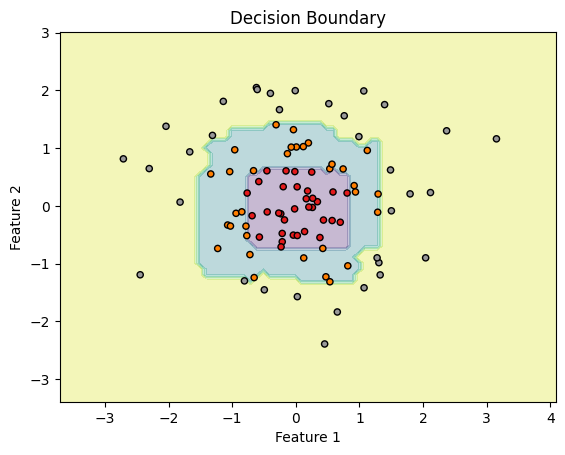


Second dataset
1.0


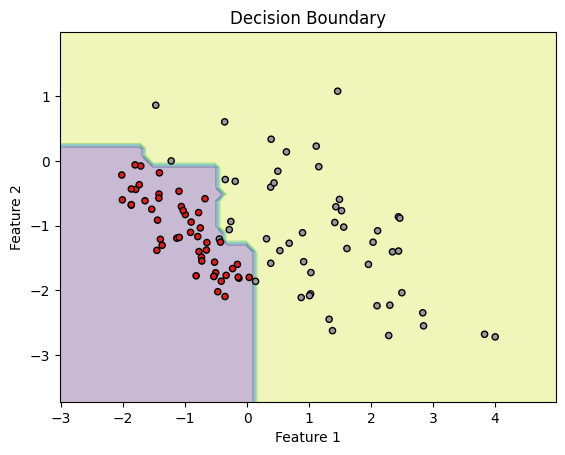

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_test, y_test)
print('First dataset')
print(rf_model.score(X_test, y_test))
plot_decision_boundary(rf_model, X_test, y_test)
print()

rf_model.fit(X1_test, y1_test)
print('Second dataset')
print(rf_model.score(X1_test, y1_test))
plot_decision_boundary(rf_model, X1_test, y1_test)


First dataset
0.64


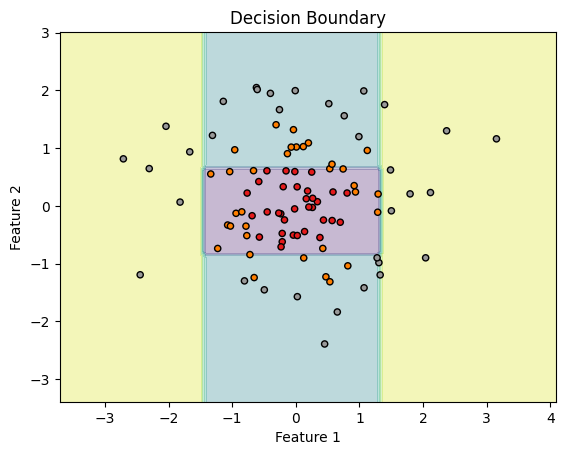


Second dataset
1.0


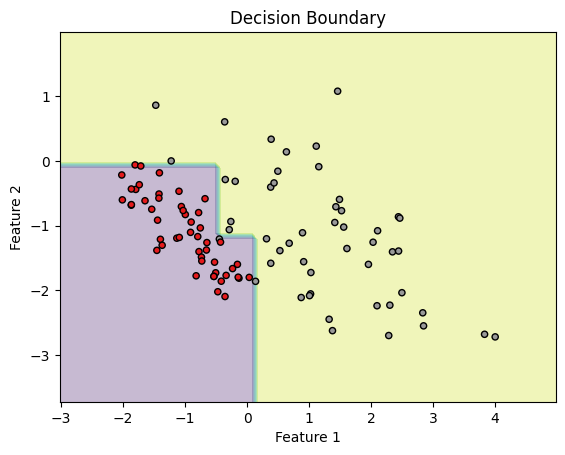

In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_test, y_test)
print('First dataset')
print(adaboost_model.score(X_test, y_test))
plot_decision_boundary(adaboost_model, X_test, y_test)


print()

adaboost_model.fit(X1_test, y1_test)
print('Second dataset')
print(adaboost_model.score(X1_test, y1_test))
plot_decision_boundary(adaboost_model, X1_test, y1_test)


First dataset
1.0


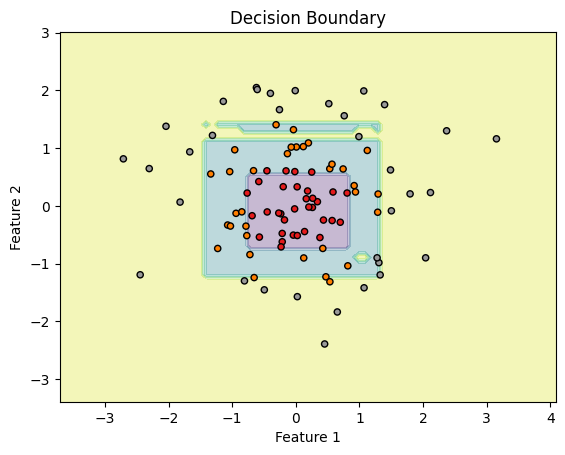


Second dataset
1.0


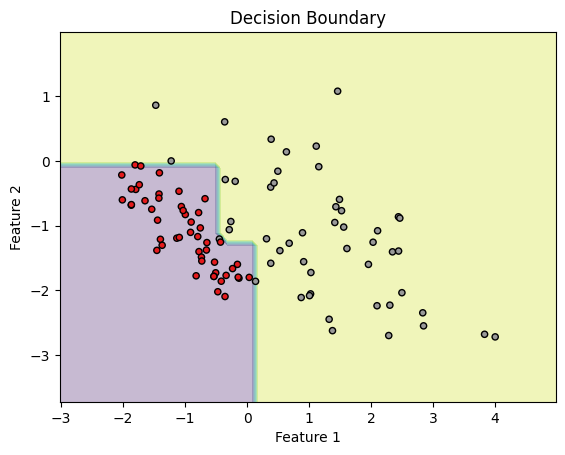

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_test, y_test)
print('First dataset')
print(gb_model.score(X_test, y_test))
plot_decision_boundary(gb_model, X_test, y_test)
print()

gb_model.fit(X1_test, y1_test)
print('Second dataset')
print(gb_model.score(X1_test, y1_test))
plot_decision_boundary(gb_model, X1_test, y1_test)
print()

e.) Based on your examination of the two data sets and the resulting plots,  what can you say about the nature of the models?

-which of them can generate curved boundaries?  Which are all straight line boundaries?

-which looks most severely overfit?

Based on the machine learning models applied in this example, we observed that models capable of generating curved structures include the logistic regression model with higher dimensions, specifically when X1 and X2 are squared, and neural networks.

Conversely, models that generate straight-line boundaries include the original logistic regression model and those with higher dimensions of data, such as neural networks with X1 and X2 squared, random forest, boosted trees like AdaBoost and gradient boosting.

Among these models, it was observed that the gradient-boosting classifier exhibited the most overfitting. This was evident in its tendency to tailor specific conditions for particular boundaries, as observed in the training dataset.